<a href="https://colab.research.google.com/github/Jwilson1172/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [1]:
# so the dataset i want to use is in zip format so i have to do some file stuff before i can even get a csv
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# path to my data set .csv
path_local='/content/bank-additional/bank-additional-full.csv'

# use the zipfile module to extract zip
def fetch_unzip():

  # download my .zip with curl because its soo much easier
  # note because im pulling a zip i use the --raw so that i dont impose an encoding
  # encoding to the zip file, i want to get it as it is from the source
  !curl --raw 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip' >'/content/bank_additional.zip'
  zip_ref=zipfile.ZipFile('/content/bank_additional.zip')
  zip_ref.extractall('/content/')
  # make sure i close my zip file
  zip_ref.close()
  return

# alternitive to the above funtion using shell commands
# it saves me from having to close files since the shell is going to handle that
# for me.
def fetch_unzip_alt():
  !curl --raw 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip' >'/content/bank_additional.zip'
  !unzip -Z '/content/bank_additional.zip' -d '/content/'
  return


# a log of R commands from im assuming an R interpreter ..fun
#!cat ./bank-additional/.Rhistory

# call my zip fetching function and print a few lines from the .csv
fetch_unzip()
# inspect the head of the file using the shell command
!head --lines=5 --verbose '/content/bank-additional/bank-additional-full.csv'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  434k  100  434k    0     0  1486k      0 --:--:-- --:--:-- --:--:-- 1486k
==> /content/bank-additional/bank-additional-full.csv <==
"age";"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
37;"services";"married";"high.school";"no";"yes";"no";"telephone";"may";"mon";226;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
40;"admin.";"married";"basic.6y";"no";"no";"no";"telephone";"may";"mon

In [2]:
# as seen above im going to have to change my delimiter to a simicolon ';' because that is how this
# dataset is organized note that i put an r in front of my string when dealing with specal characters out of habit
# in this instance it dosent do anything because there is no escaping characters present
df=pd.read_csv(path_local,sep=r';')
# inspect head
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# inspect tail
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
# look at column datatypes
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
# skip count row it will be in the next cell as shape
df.describe()[1:]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# there are only suposed to be 20 features in this df so im going to remove the
# target column
y_true=df.pop('y')
print(f"number of rows:{df.shape[0]}\nnumber of columns:{df.shape[1]}")


number of rows:41188
number of columns:20


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [52]:
from google.colab import files
uploaded=files.upload()

Saving flag.data to flag.data


In [53]:
!head -n 5 /content/flag.data

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [54]:
# make ours list of col_names from the <dataset>.names file in this case the
# flags data set
names=['name','landmass','zone','area','population','language', 'religion', 'bars',
       'stripes', 'colours','red', 'green','blue','gold','white','black','orange',
       'mainhue','circles','crosses','saltires','quarters','sunstars','crescent',
       'triangle','icon','animate','text','topleft','botright']

# init flagss dataframe
flags_df=pd.read_csv('/content/flag.data',names=names)

# print some info about missing values
print(f"\nis na:\n{flags_df.isna().sum()}")
print(f"\nis null:\n{flags_df.isnull().sum()}")

# print info about the description of numberic columns and dtypes
print(f"\nflag_df.describe(numberic):\n{flags_df.describe()}")
print(f"\nflag_df.describe(object<str>):\n{flags_df.describe(exclude='number')}")
print(f"\nflags dtypes:\n{flags_df.dtypes}")



is na:
name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64

is null:
name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: in

In [55]:
# taking a look at the data there are a lot of numberic data values that can be
# converted into cat values.
flags_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [7]:
# a crosstab of job vs education
# i was curious to see if there were any patterns espically in the entrepreneur
# feild
pd.crosstab(df.job,df.education)

# looking at this data im curious to know what distrinction is made between 
# entreprenueur and self-employed i always associate theese two terms togeather


education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [8]:
#did a cross tab using housing as athe index and loan as the cols
# results are to be exspected a larger percent of people who own houses have loans
pd.crosstab(df.housing,df.loan)

loan,no,unknown,yes
housing,,,
no,16065,0,2557
unknown,0,990,0
yes,17885,0,3691


In [0]:
# map months to numbers with a dict so i can sort them in the crosstab
month_map={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'nov':10,'oct':11,'dec':12}
df.month=df.month.map(month_map)


In [10]:
# create a crosstab of the month and day of the week that the customer was
# last contacted the bank and a name it a variable to make visuals later
days_months_cross=pd.crosstab(df.month.sort_index(),df.day_of_week)
days_months_cross

day_of_week,fri,mon,thu,tue,wed
month,,,,,
3,94,143,99,140,70
4,610,702,768,252,300
5,2858,2642,2537,2809,2923
6,1147,1251,967,970,983
7,1012,1516,1672,1517,1457
8,1070,1222,1347,1296,1243
9,115,90,122,118,125
10,755,766,903,814,863
11,142,129,163,149,135


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

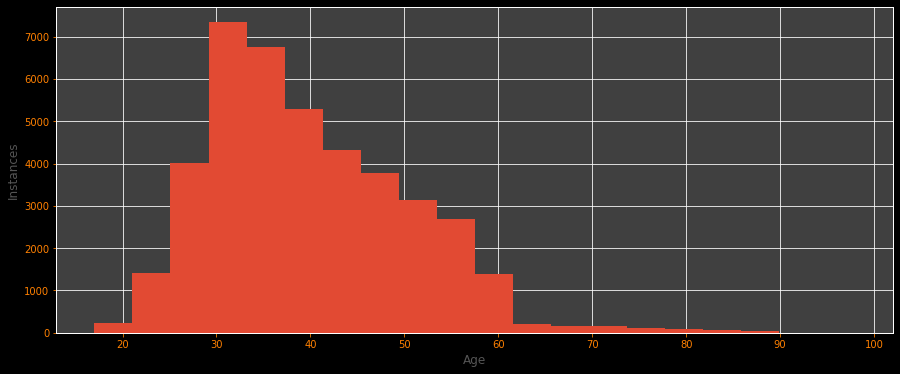

In [60]:
# some tweaks to look and feel
# works well on dark theme
plt.style.use(['ggplot'])
plt.rcParams['axes.facecolor']='404040'
plt.rcParams['figure.facecolor']='black'
plt.rcParams['xtick.color']='ff8000'
plt.rcParams['ytick.color']='ff8000'
plt.rcParams['lines.linewidth']=2.5
plt.rcParams['figure.figsize']=(15,6)

# make a histogram of the age distribution
plt.xlabel("Age")
plt.ylabel("Instances")
df.age.hist(bins=20)
plt.show()


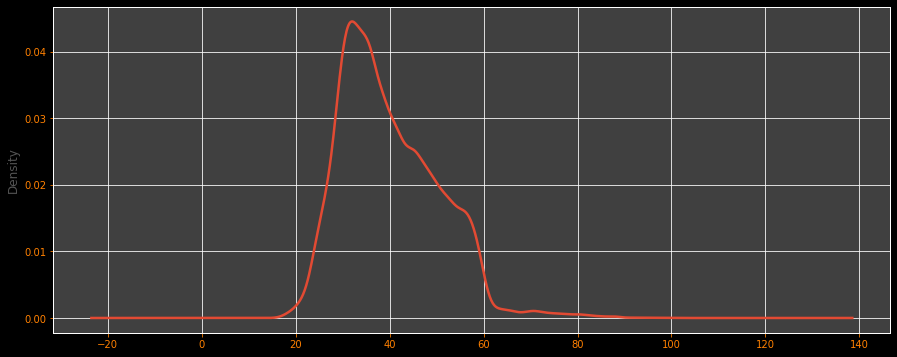

In [65]:
# make a kernal density graph from the age data to see hoe it differs from the hist
df.age.plot(kind='kde')
plt.show()

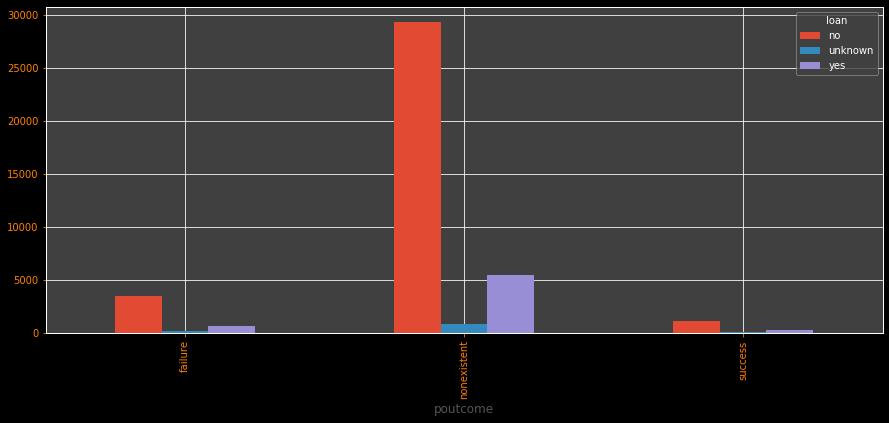

In [61]:
# this is a bit of a cunfusing graph at first but its not that bad
# on the y axis you have the instances
# on the x acis you have if the past marketing campain was successful
# the respective bars are if the person has a personal loan
ct=pd.crosstab(df.poutcome,df.loan)
ct.plot(kind='bar')
plt.show()

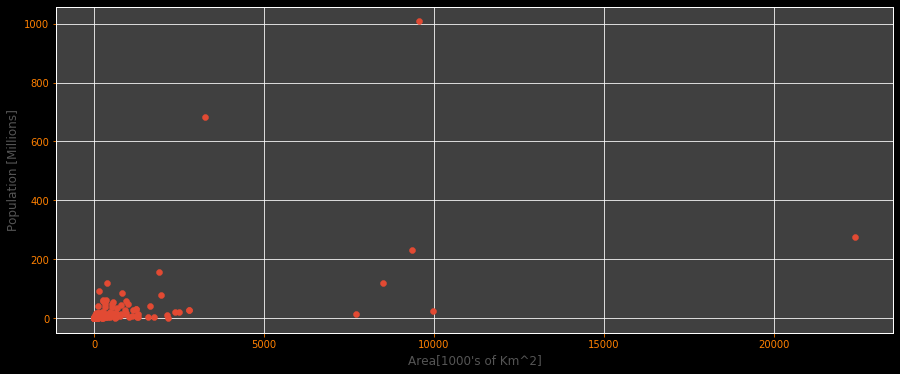

In [62]:
# switching to my flags set, make a scatter of population and area
plt.xlabel("Area[1000's of Km^2]")
plt.ylabel("Population [Millions]")
plt.scatter(flags_df.area,flags_df.population)
plt.show()

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


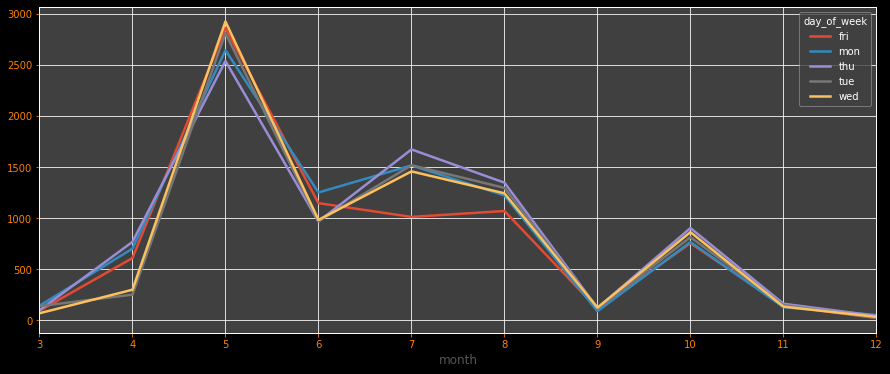

In [63]:
# a line graph of the crosstab i did above using the months of the year as x
# and the instances of occurence as y
days_months_cross.plot()
plt.show()

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.